In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yfin
%matplotlib inline

In [4]:
assets = ['PG', '^GSPC']

pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = yfin.download(a,start='2010-1-1')['Adj Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
pf_data.tail()

,PG,^GSPC
Date,,
2023-12-01,152.660004,4594.629883
2023-12-04,152.059998,4569.779785
2023-12-05,146.759995,4567.180176
2023-12-06,146.649994,4549.339844
2023-12-07,146.500000,4585.589844


In [6]:
pf_data.iloc[0]

PG         40.413696
^GSPC    1132.989990
Name: 2010-01-04 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

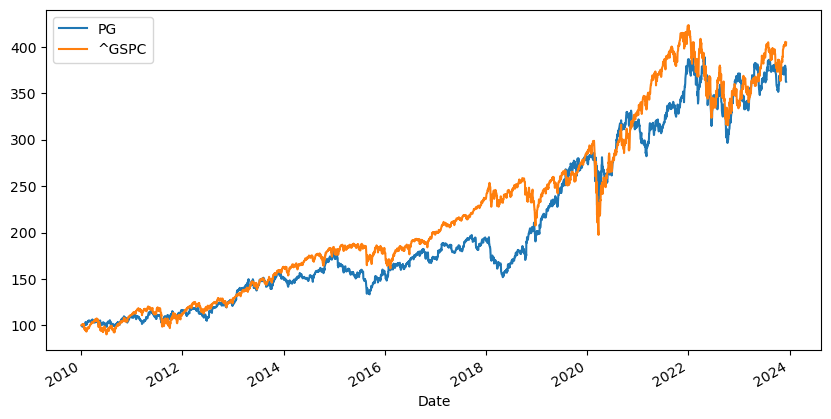

In [7]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize = (10,5))

In [8]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [9]:
log_returns.mean() * 250

PG       0.091832
^GSPC    0.099690
dtype: float64

In [10]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029420,0.016922
^GSPC,0.016922,0.030711


In [11]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.562984
^GSPC,0.562984,1.000000


In [12]:
num_assets = len(assets)
num_assets

2

In [13]:
arr = np.random.random(num_assets)
arr

array([0.84144211, 0.71792856])

In [14]:
arr[0] + arr[1]

1.5593706700088596

In [15]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)                     ## w = w/sum(w) weight is an array w = [w1 w2]   w1/w1+w2 + w2/w1+w2 = w1+w2/w1+w2=1.0
weights

array([0.95450077, 0.04549923])

In [16]:
weights[0] + weights[1]

1.0

# Expected Portfolio Return:

In [17]:
np.sum(weights * log_returns.mean() * 250)

0.09218987353922233

# Expected Portfolio Variance:

In [18]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.028337133076204436

# Expected Portfolio Volatility:


In [19]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.16833636884584519

In [28]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights) 
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_volatilities

([0.09640836095234427,
  0.09583991847309048,
  0.09392185590954903,
  0.09887248956011127,
  0.09598094308967364,
  0.0922171578171061,
  0.09635308241869825,
  0.09352104205176544,
  0.09860490759054853,
  0.09485920202790987,
  0.09389491891016048,
  0.09524801246068298,
  0.09583048957579988,
  0.09951422884177052,
  0.0956268011647259,
  0.0979318857167601,
  0.09859719440518461,
  0.09614868404626735,
  0.0955733643531264,
  0.0957590541589673,
  0.09645121929018294,
  0.09245398469364367,
  0.0996759031979916,
  0.09488800125357198,
  0.09552634943951227,
  0.097492050131577,
  0.09963934611282575,
  0.09720278476332342,
  0.09895185347030408,
  0.09484479672739135,
  0.09644682955554736,
  0.09525038460581528,
  0.09670103810540473,
  0.09595950894042436,
  0.09409991437864008,
  0.09499756296046998,
  0.09348166077845424,
  0.0973643543614448,
  0.09727650360016928,
  0.09414536745624308,
  0.0944193094985773,
  0.09857142874755699,
  0.09526450393788995,
  0.09411202447628855

In [29]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights) 
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09758548, 0.09421497, 0.09865576, 0.09492008, 0.09527151,
        0.09781994, 0.09288591, 0.09631375, 0.09788694, 0.09683239,
        0.09556225, 0.09604089, 0.09749183, 0.09876436, 0.09625241,
        0.09640347, 0.09639274, 0.09923803, 0.09960229, 0.09498315,
        0.09669752, 0.09211782, 0.09201032, 0.09624156, 0.09218185,
        0.09200173, 0.09410433, 0.09913624, 0.0954317 , 0.09873293,
        0.0957015 , 0.09594431, 0.09480355, 0.09339627, 0.09338948,
        0.09738195, 0.09701508, 0.09222439, 0.09423106, 0.09949459,
        0.09694949, 0.09331957, 0.09513429, 0.09530079, 0.09212956,
        0.09656518, 0.09811683, 0.09646083, 0.09815263, 0.0988915 ,
        0.09959663, 0.09910414, 0.09370475, 0.09591839, 0.09583132,
        0.09951541, 0.09525813, 0.09438651, 0.09783715, 0.09376789,
        0.09950666, 0.09189874, 0.09232016, 0.09638643, 0.09377079,
        0.09829863, 0.09643131, 0.09546492, 0.0980537 , 0.09546848,
        0.09933983, 0.09530293, 0.0956926 , 0.09

In [30]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [31]:
portfolios.head()

,Return,Volatility
0,0.097585,0.158776
1,0.094215,0.155749
2,0.098656,0.165938
3,0.094920,0.153808
4,0.095272,0.153348


In [32]:
portfolios.tail()

,Return,Volatility
995,0.099420,0.172603
996,0.096576,0.154628
997,0.095641,0.153233
998,0.094484,0.154852
999,0.095919,0.153395


Text(0, 0.5, 'Expected Return')

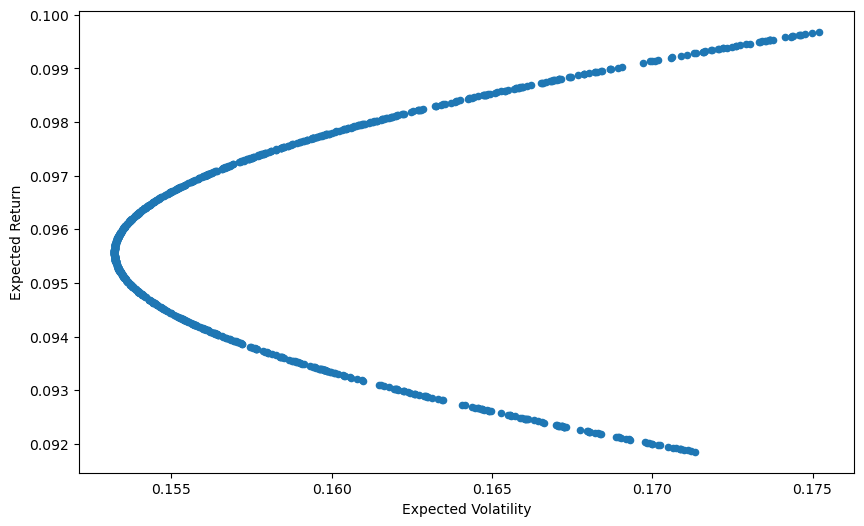

In [33]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')